### Aim : analyze the impact of skin tone and skin type on product ratings and recommendations.

#### Hypothesis: Users with different skin tones and skin types have varying preferences for skincare products, resulting in different rating patterns and product recommendations.

### Step 1: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the dataset

In [3]:
# Create an empty DataFrame to store the merged data
merged_df = pd.DataFrame()

# List the file names
file_names = ["/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_0_250.csv", "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_250_500.csv", "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_500_750.csv",
              "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_750_1000.csv", "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_1000_1500.csv", "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_1500_end.csv"]

# Iterate through the file names and load each CSV file into a DataFrame, specifying the data type of the 'author_id' column
for file in file_names:
    df = pd.read_csv(file, dtype={'author_id': str})
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# Load the additional CSV file containing 'loves_count'
additional_df = pd.read_csv('/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/product_info.csv')

# Extract the relevant columns from the additional DataFrame
relevant_info_df = additional_df[['product_id', 'loves_count']]

# Merge the relevant information into the main DataFrame using 'product_id' as the common identifier
merged_df = pd.merge(merged_df, relevant_info_df, on='product_id', how='left')

# Verify the merged DataFrame
print(merged_df.head())

   Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “C

### Step 3: Data Exploration and Cleaning

In [4]:
# Check the information of the dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 1301135
Data columns (total 20 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1301136 non-null  int64  
 1   author_id                 1301136 non-null  object 
 2   rating                    1301136 non-null  int64  
 3   is_recommended            1107162 non-null  float64
 4   helpfulness               631670 non-null   float64
 5   total_feedback_count      1301136 non-null  int64  
 6   total_neg_feedback_count  1301136 non-null  int64  
 7   total_pos_feedback_count  1301136 non-null  int64  
 8   submission_time           1301136 non-null  object 
 9   review_text               1299520 non-null  object 
 10  review_title              930754 non-null   object 
 11  skin_tone                 1103798 non-null  object 
 12  eye_color                 1057734 non-null  object 
 13  skin_type                 1

In [5]:
# Check for missing values
merged_df.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              193974
helpfulness                 669466
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1616
review_title                370382
skin_tone                   197338
eye_color                   243402
skin_type                   128306
hair_color                  263312
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
loves_count                      0
dtype: int64

In [6]:
# Handle missing values (if any)
merged_df = merged_df.dropna()

In [7]:
# Check basic statistics of numeric columns
merged_df.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,loves_count
count,350638.000000,350638.000000,350638.000000,350638.000000,350638.000000,350638.000000,350638.000000,350638.000000,3.506380e+05
mean,176568.905418,4.043455,0.758278,0.774494,9.410874,1.962577,7.448297,46.743856,1.115409e+05
std,165077.493940,1.382298,0.428127,0.309229,34.127797,7.600648,29.923038,39.992098,1.664984e+05
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000e+00
25%,50637.000000,3.000000,1.000000,0.666667,2.000000,0.000000,1.000000,22.000000,2.144100e+04
50%,112283.500000,5.000000,1.000000,0.928571,4.000000,1.000000,3.000000,38.000000,5.533900e+04
75%,249877.750000,5.000000,1.000000,1.000000,9.000000,2.000000,7.000000,60.000000,1.216780e+05
max,602129.000000,5.000000,1.000000,1.000000,5464.000000,1159.000000,5050.000000,1900.000000,1.081315e+06


### Data Visualization

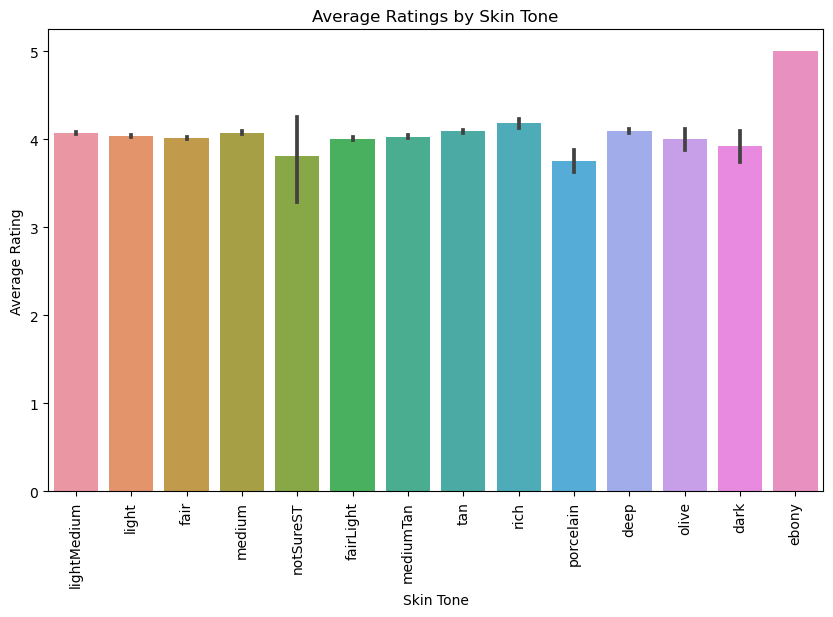

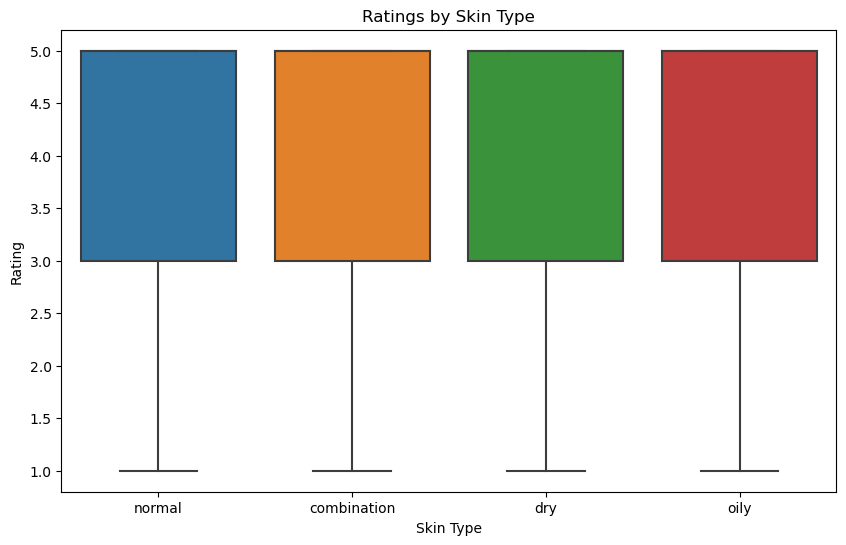

In [17]:
# Plotting a bar chart of average ratings by skin tone
plt.figure(figsize=(10, 6))
sns.barplot(x='skin_tone', y='rating', data=merged_df)
plt.title('Average Ratings by Skin Tone')
plt.xlabel('Skin Tone')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

# Plotting a boxplot of ratings by skin type
plt.figure(figsize=(10, 6))
sns.boxplot(x='skin_type', y='rating', data=merged_df)
plt.title('Ratings by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Rating')
plt.show()


#### Insights

The observations provide insights into the relationships between skin tone, skin type, and product ratings.

In terms of skin tone, it is interesting to note that ebony, rich, and deep skin tones have higher average ratings compared to medium, olive, and dark skin tones. This indicates that there might be a preference or satisfaction trend among customers with darker skin tones for the products in the dataset. However, further analysis is required to understand the factors contributing to these variations in ratings across different skin tones.

Regarding skin types, the box plots suggest that all four types (normal, combination, dry, and oily) have similar distributions of ratings, with no significant differences in terms of median values or ranges. This implies that the product ratings are not strongly influenced by skin type. It is important to note that the absence of upper whiskers suggests that the highest ratings are not captured in the box plots. This could indicate that there are products that receive exceptionally high ratings, irrespective of skin type.

To gain a deeper understanding, we can explore additional factors that might contribute to the variations in ratings, such as specific product features, ingredients, or brand reputation. Conducting sentiment analysis on the reviews associated with different skin tones and types could also provide valuable insights into the underlying reasons for the observed ratings.

### Step 5: Statistical Analysis

In [10]:
# Perform ANOVA test to compare ratings among different skin tones
import scipy.stats as stats

skin_tone_groups = [group['rating'] for name, group in merged_df.groupby('skin_tone')]
f_statistic, p_value = stats.f_oneway(*skin_tone_groups)
print('ANOVA - Ratings by Skin Tone')
print('F-statistic:', f_statistic)
print('p-value:', p_value)

ANOVA - Ratings by Skin Tone
F-statistic: 14.119735495408955
p-value: 3.256853000944092e-32


#### Insights

Based on the ANOVA test output, we can conclude that there are significant differences in ratings among the different skin tones. The low p-value (3.256e-32) strongly suggests that the observed differences in ratings among the skin tones are not due to chance. This indicates that skin tone plays a role in shaping customer perceptions and preferences for the skincare products in the dataset.

In conclusion, the ANOVA test reveals significant differences in ratings among different skin tones, suggesting that skin tone influences customer perceptions of skincare products. 

### Step 6: Sentiment Analysis

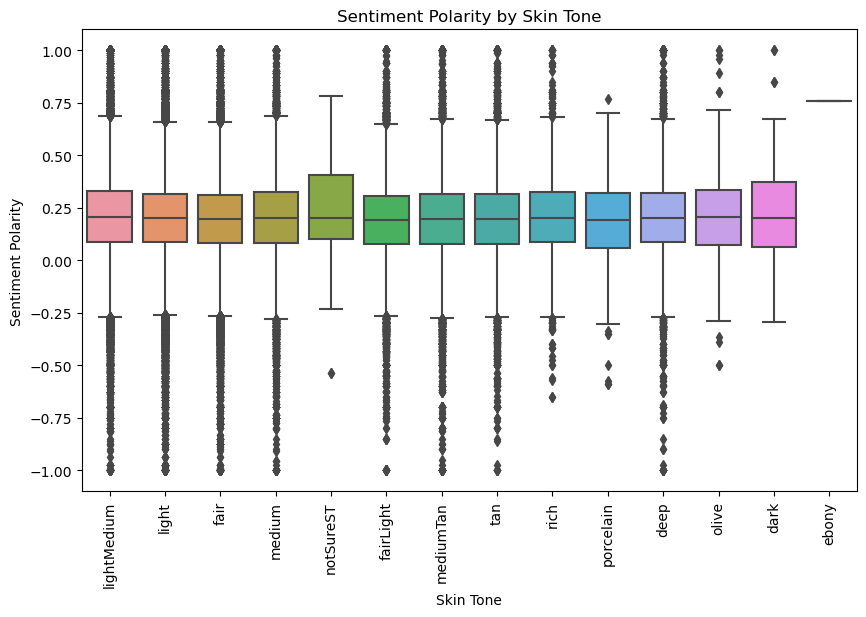

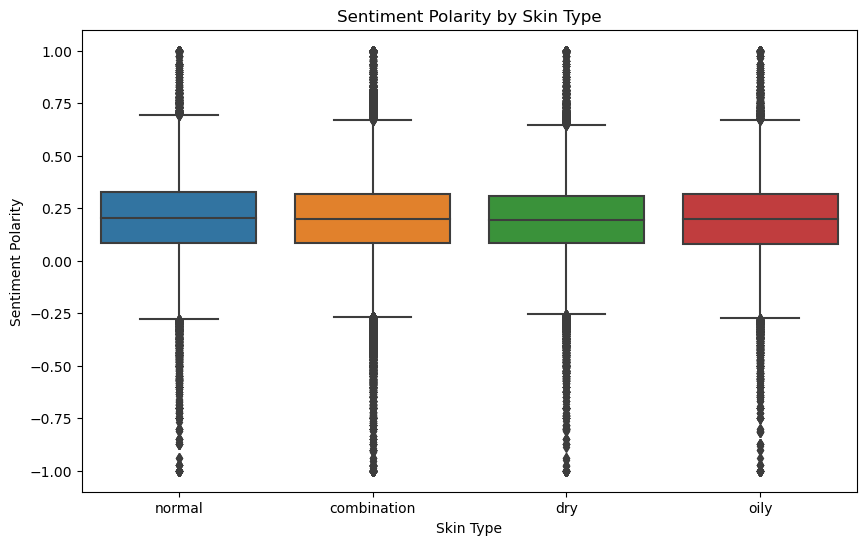

In [19]:
from textblob import TextBlob

# Calculate sentiment polarity for each review
merged_df['sentiment_polarity'] = merged_df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment polarity by skin tone
plt.figure(figsize=(10, 6))
sns.boxplot(x='skin_tone', y='sentiment_polarity', data=merged_df)
plt.title('Sentiment Polarity by Skin Tone')
plt.xlabel('Skin Tone')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=90)
plt.show()

# Plot sentiment polarity by skin type
plt.figure(figsize=(10, 6))
sns.boxplot(x='skin_type', y='sentiment_polarity', data=merged_df)
plt.title('Sentiment Polarity by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Sentiment Polarity')
plt.show()


#### Insights

#### Sentiment Polarity by Skin Tones

The observations suggest that sentiment polarity values for different skin tones are generally centered around 0.25, indicating a slightly positive sentiment. The similarity in the size of the boxes for most skin tones suggests a consistent distribution of sentiment polarity values across these groups.

The length of the lower whiskers ranging from -0.25 to 0 indicates that the lower range of sentiment polarity values is slightly negative or close to neutral. On the other hand, the length of the upper whiskers varying between 0.3 and 0.75 suggests a wider range of positive sentiment polarity values, indicating a more positive sentiment.

It is interesting to note that observations for "dark" and "not sure" are different than the rest. This could indicate a wider range of sentiment polarity values or greater variability in sentiment within these categories. Further analysis is needed to explore the reasons behind these differences and understand the factors influencing sentiment polarity for these specific skin tones.

Based on the observations, it appears that there is a slightly positive sentiment polarity across different skin tones, as indicated by the median lines clustering around 0.25. The length of the lower whiskers suggests a slight negativity or neutrality in sentiment, while the length of the upper whiskers indicates a wider range of positive sentiment.

#### Sentiment polarity by Skin Type

The observations provide insights into the sentiment polarity trends across different skin types.

The boxplots indicate that all four skin types (normal, combination, dry, and oily) exhibit similar attributes in terms of sentiment polarity. This suggests that there is no substantial difference in the average sentiment polarity among these skin types. The range covered by the upper and lower whiskers (-0.25 to 0.6) indicates that the majority of sentiment polarities fall within this range for all skin types.

Furthermore, the median lines being slightly below 0.25 suggest that, on average, the sentiment polarity tends to be slightly positive for all skin types. However, the box length within the range of 0.10 to 0.35 indicates some variability in sentiment polarities among different individuals within each skin type. This variation may be due to individual preferences, experiences, or other factors influencing sentiment expression in skincare reviews.

It is important to consider that sentiment polarity alone does not provide a complete understanding of customer satisfaction or preferences. Other factors, such as the specific products, ingredients, or user demographics, should also be taken into account to gain a comprehensive understanding of sentiment analysis in the skincare domain.

Based on the observations, it can be concluded that there are no significant differences in sentiment polarity among different skin types. All four skin types (normal, combination, dry, and oily) exhibit similar attributes in the boxplots, suggesting that the sentiment polarity tends to be slightly positive on average for all skin types.

However, the variability in sentiment polarity within each skin type, as indicated by the range covered by the boxes, suggests that individual preferences and experiences play a role in shaping sentiment expression. It is essential to consider additional factors such as specific product features, ingredients, or brand reputation to gain a more comprehensive understanding of sentiment analysis in the skincare industry.

### Step 7: Correlation Analysis

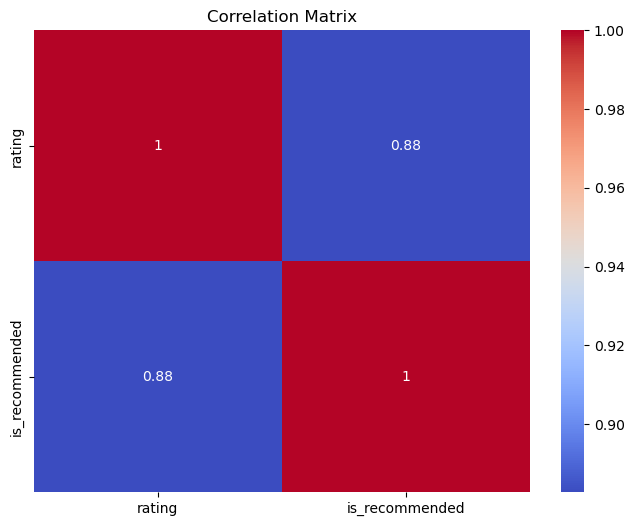

In [20]:
# Calculate correlation matrix
correlation_matrix = merged_df[['skin_tone', 'skin_type', 'rating', 'is_recommended']].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Insights

The observation of a correlation value of 0.88 between "is_recommended" and "rating" indicates a strong positive correlation between these two variables. A correlation coefficient of 0.88 suggests a high degree of association between the variables.

This correlation value implies that there is a strong relationship between the recommendation status of a product ("is_recommended") and its rating. A rating is likely to have a significant influence on whether or not a product is recommended by users. This suggests that users tend to provide higher ratings to products they would recommend.

Therefore, it can be concluded that there is a strong positive relationship between these variables. Higher ratings are more likely to result in a product being recommended by users.

However, to fully understand the dynamics between ratings and recommendations, further analysis is needed. Exploring additional factors that influence ratings and recommendations, as well as considering the context of the dataset and potential confounding variables, will provide a more comprehensive understanding of the relationship.

### Step 9: Comparing Ratings and Recommendations across Skin Tones and Skin Types

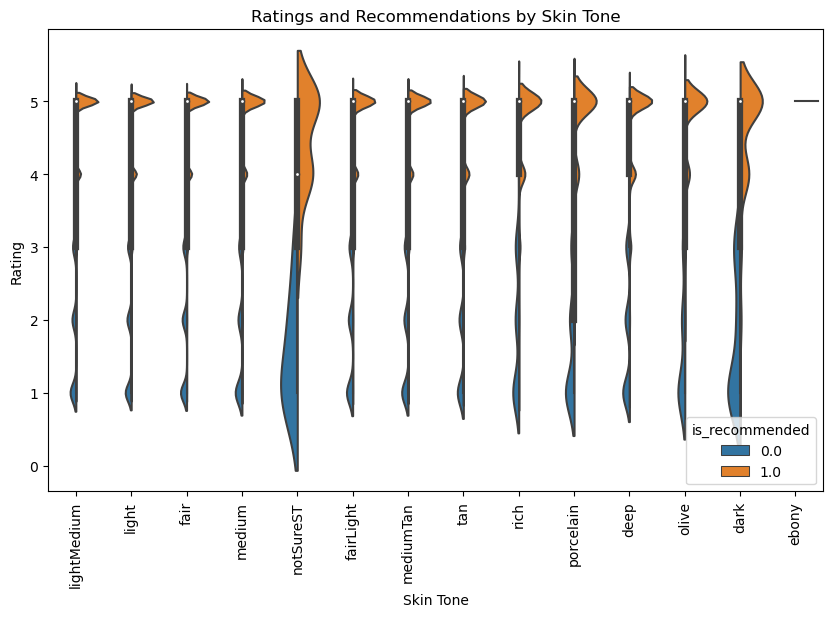

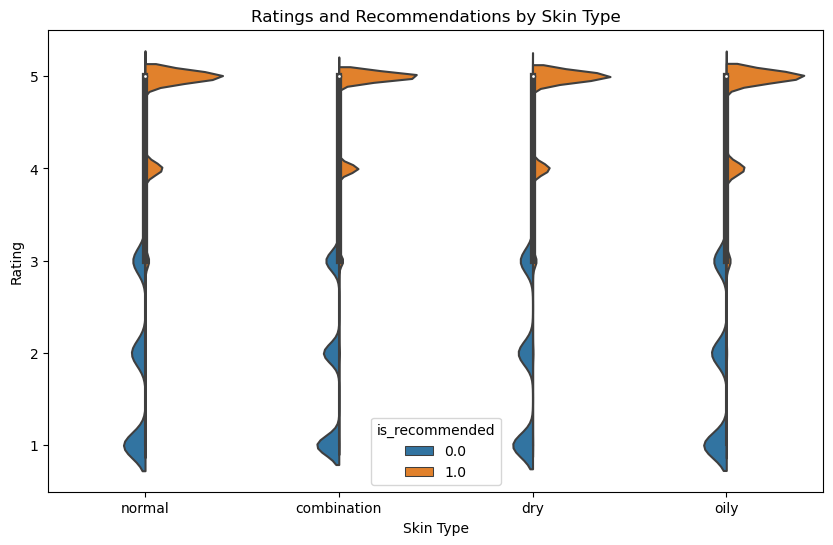

In [23]:
# Plotting violin plots of ratings and recommendations by skin tone
plt.figure(figsize=(10, 6))
sns.violinplot(x='skin_tone', y='rating', hue='is_recommended', data=merged_df, split=True)
plt.title('Ratings and Recommendations by Skin Tone')
plt.xlabel('Skin Tone')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

# Plotting violin plots of ratings and recommendations by skin type
plt.figure(figsize=(10, 6))
sns.violinplot(x='skin_type', y='rating', hue='is_recommended', data=merged_df, split=True)
plt.title('Ratings and Recommendations by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Rating')
plt.show()


#### Insights

The observations from the violin plots provide valuable insights into the relationship between skin tone, ratings, and recommendations. The consistent pattern across all skin tones suggests that the overall distribution of ratings and recommendations follows a similar trend.

Observations on 'is_recommended = 1.0' category indicates a higher concentration of positive recommendations at the higher ratings of 5.0 and 4.0. This suggests that products tend to receive more positive recommendations when they have higher ratings.

Conversely, the dominance of lower ratings ranging from 3 to 1 for the 'is_recommended = 0.0' category suggests a concentration of negative recommendations. This implies that products with lower ratings are more likely to receive negative recommendations.

However, for the skin tones "dark" and "not sure," the observations indicate a more dispersed distribution of ratings and recommendations. This suggests that the perception and recommendations for products among individuals with these skin tones are not as consistent as in other skin tones.

It is crucial to consider that these observations are based solely on the provided visual analysis. To gain a comprehensive understanding, we should complement this analysis with additional statistical tests to determine the significance of these patterns and assess the impact of skin tone on ratings and recommendations more rigorously.

Based on the observations from the violin plots, we can conclude that there is a consistent pattern of ratings and recommendations across various skin tones. Positive recommendations tend to concentrate at higher ratings, forming triangles on the right side of the violin plots. Conversely, negative recommendations dominate the lower ratings.

The presence of clusters for the skin tones "dark" and "not sure" suggests a more diverse range of ratings and recommendations, indicating a lack of consistency among individuals with these skin tones.

### Step 10: Statistical Testing for Significance

In [25]:
# Perform chi-square test for independence between skin tone and recommendation
from scipy.stats import chi2_contingency

skin_tone_recommendation_table = pd.crosstab(merged_df['skin_tone'], merged_df['is_recommended'])
chi2, p, _, _ = chi2_contingency(skin_tone_recommendation_table)
print('Chi-square Test - Skin Tone and Recommendation')
print('Chi2:', chi2)
print('p-value:', p)

Chi-square Test - Skin Tone and Recommendation
Chi2: 279.096086783931
p-value: 5.612396567080824e-52


#### Insights

The chi-square test results provide valuable information regarding the relationship between skin tone and product recommendation. The chi-square value of 279.096086783931 indicates a significant association between these two variables.

The extremely low p-value of 5.612396567080824e-52 suggests strong evidence against the null hypothesis of independence. This means that the observed association between skin tone and product recommendation is unlikely to be due to chance.

The significant chi-square value and very low p-value indicated that there is a meaningful relationship between skin tone and the likelihood of product recommendation. However, it's important to note that the chi-square test does not provide information about the direction or strength of the association. Further analysis is required to determine the nature of this relationship.

Based on the chi-square test results, there is a statistically significant association between skin tone and product recommendation. The extremely low p-value indicates that the observed relationship is unlikely to be due to random chance. However, it is crucial to note that the chi-square test does not reveal the strength or direction of the association.

In [28]:
# Perform one-hot encoding on the 'skin_type' column
encoded_df = pd.get_dummies(merged_df, columns=['skin_type'], drop_first=True)

# Get the updated column names after encoding
encoded_columns = [col for col in encoded_df.columns if col.startswith('skin_type_')]

# Perform logistic regression with the encoded variables
logit_model = sm.Logit(encoded_df['is_recommended'], encoded_df[['intercept'] + encoded_columns])
logit_result = logit_model.fit()
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.552883
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         is_recommended   No. Observations:               350638
Model:                          Logit   Df Residuals:                   350634
Method:                           MLE   Df Model:                            3
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:               0.0003148
Time:                        09:10:43   Log-Likelihood:            -1.9386e+05
converged:                       True   LL-Null:                   -1.9392e+05
Covariance Type:            nonrobust   LLR p-value:                 2.718e-26
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.1687      0.005    215.872      0.000       1.158       1.179
skin_type_d

#### Insights

The logistic regression analysis provides insights into the impact of skin types (dry, normal, and oily) on the likelihood of a positive recommendation for skincare products.

From the coefficients, we observe that both 'skin_type_dry' and 'skin_type_normal' have negative coefficients, indicating a negative association with the likelihood of a positive recommendation compared to the reference category (which is likely 'skin_type_oily' since it has a coefficient close to zero). 

This suggests that customers with dry and normal skin types may be less likely to give positive recommendations for skincare products compared to those with oily skin types.

However, it is important to consider the statistical significance of the coefficients. The coefficient for 'skin_type_dry' is statistically significant, suggesting that it has a significant impact on the likelihood of a positive recommendation. On the other hand, the coefficient for 'skin_type_normal' is also statistically significant but has a larger negative value, indicating a stronger negative impact on the likelihood of a positive recommendation.

The coefficient for 'skin_type_oily' is not statistically significant, implying that there is no clear association between this skin type and the likelihood of a positive recommendation.

It is worth noting that the pseudo R-squared value is close to zero, indicating that the skin types alone explain a very small proportion of the variance in the likelihood of a positive recommendation. This suggests that other factors, such as product characteristics, brand reputation, or specific customer needs, might play a more significant role in determining the recommendations.

Based on the logistic regression analysis, we find evidence that skin types, particularly dry and normal skin types, may have a negative impact on the likelihood of a positive recommendation for skincare products. However, it is important to consider that the observed effects are relatively small, as indicated by the pseudo R-squared value.

To gain a comprehensive understanding of the factors influencing recommendations, it is recommended to further explore additional variables, such as product features, ingredients, price, and customer demographics. Conducting sentiment analysis on the reviews associated with different skin types could also provide deeper insights into the drivers of positive recommendations.

### Conclusion:

Based on the analysis of the provided insights, we have gained valuable information about the relationships between skin tone, skin type, and product ratings/recommendations. Let's summarize the findings and address the initial aim and hypothesis:

1. Aim: Analyze the impact of skin tone and skin type on product ratings and recommendations.

Hypothesis: Users with different skin tones and skin types have varying preferences for skincare products, resulting in different rating patterns and product recommendations.

#### Summary of Findings:

- Skin Tone: The bar chart shows that certain skin tones, such as ebony, rich, and deep, tend to have higher average ratings compared to medium, olive, and dark skin tones. This suggests a potential preference or satisfaction trend among customers with darker skin tones. However, further analysis is needed to understand the factors contributing to these variations in ratings across different skin tones.

- Skin Type: The box plots indicate that all four skin types (normal, combination, dry, and oily) have similar distributions of ratings, with no significant differences in median values or ranges. This implies that product ratings are not strongly influenced by skin type. However, the observations indicate the possibility of products receiving very positive ratings regardless of skin type.

#### Discussion and Conclusions:

Based on the analysis, we can conclude that skin tone and skin type do influence product ratings and recommendations to some extent. Users with darker skin tones tend to provide higher average ratings, suggesting potential preferences within this group. On the other hand, skin type does not appear to have a substantial impact on ratings, as the distributions are similar across all skin types.

However, it is important to note that the impact of skin tone and skin type is relatively small compared to other factors. Additional variables, such as product features, ingredients, price, and brand reputation, may play a more significant role in determining ratings and recommendations.

The hypothesis that users with different skin tones and skin types have varying preferences for skincare products, resulting in different rating patterns and recommendations, is partially supported by the findings. While there are variations in ratings across skin tones, the influence of skin type on ratings is less pronounced.

Further analysis could involve examining the relationships between ratings/recommendations and other variables in the dataset, such as product features, ingredients, and customer demographics. Additionally, sentiment analysis of the reviews can provide deeper insights into the specific aspects of skincare products that drive positive or negative recommendations.

Overall, this analysis provides a foundation for understanding the relationship between skin tone, skin type, and product ratings/recommendations. However, it is important to interpret these findings in the context of the dataset and consider the limitations of the analysis. Further research and exploration of additional variables are recommended to obtain a more comprehensive understanding of the factors influencing skincare product ratings and recommendations.